In [80]:
import numpy as np      # To use np.arrays
import pandas as pd     # To use dataframes

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline        
import seaborn as sns

In [81]:
df_train_set = pd.read_csv('Training_set_values.csv') # train set data
df_train_labels = pd.read_csv('Training_set_labels.csv') #train set labels data
df_test_set = pd.read_csv('Test_set_values.csv') #test set  data

In [82]:
df_train_set.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [83]:
df_train_set['funder'].value_counts().head(20)


Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Dhv                        829
Private Individual         826
Dwsp                       811
0                          777
Norad                      765
Germany Republi            610
Tcrs                       602
Ministry Of Water          590
Water                      583
Dwe                        484
Name: funder, dtype: int64

In [84]:
df_train_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [85]:
df_test_set.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [86]:
df_train_set.info() #to see the types of the columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [87]:
df_train_set.isna().sum() # to see the null values


id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [88]:
df_test_set.isna().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                    869
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7092
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

In [89]:
df_train_set.describe() # to see numeric columns detailed


,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [90]:
df_train_labels['status_group'].value_counts()


functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

# Dealing with missing values

In [91]:
df_train_set['funder'].fillna('unknown',inplace=True)  # filling null values with 'unknown'
df_train_set['installer'].fillna('unknown',inplace=True) 
df_train_set['subvillage'].fillna('unknown',inplace=True)  
df_train_set['public_meeting'].fillna(True,inplace=True)
df_train_set['scheme_management'].fillna('unknown',inplace=True)
df_train_set['scheme_name'].fillna('unknown',inplace=True)
df_train_set['permit'].fillna(True,inplace=True)


In [92]:
df_test_set['funder'].fillna('unknown',inplace=True)  # filling null values with '0'
df_test_set['installer'].fillna('unknown',inplace=True)
df_test_set['subvillage'].fillna('unknown',inplace=True)
df_test_set['public_meeting'].fillna(True,inplace=True)
df_test_set['scheme_management'].fillna('unknown',inplace=True)
df_test_set['scheme_name'].fillna('unknown',inplace=True)
df_test_set['permit'].fillna(True,inplace=True)

In [93]:
df_test_set.isna().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
s

In [94]:
df_train_set.isna().sum() # to see the null values


id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
s

In [95]:
df_train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 59400 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              59400 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59400 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

# Dropping similar features

In [96]:
correlations = df_train_set.corr()
correlations

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,public_meeting,permit,construction_year
id,1.000000,-0.005321,-0.004692,-0.001348,0.001718,-0.002629,-0.003028,-0.003044,-0.002813,0.004359,-0.000070,-0.002082
amount_tsh,-0.005321,1.000000,0.076650,0.022134,-0.052670,0.002944,-0.026813,-0.023599,0.016288,0.015798,0.023026,0.067915
gps_height,-0.004692,0.076650,1.000000,0.149155,-0.035751,0.007237,-0.183521,-0.171233,0.135003,0.037207,0.091959,0.658727
longitude,-0.001348,0.022134,0.149155,1.000000,-0.425802,0.023873,0.034197,0.151398,0.086590,0.016962,0.103182,0.396732
latitude,0.001718,-0.052670,-0.035751,-0.425802,1.000000,0.006837,-0.221018,-0.201020,-0.022152,0.009084,0.070615,-0.245278
num_private,-0.002629,0.002944,0.007237,0.023873,0.006837,1.000000,-0.020377,-0.004478,0.003818,0.008618,0.008602,0.026056
region_code,-0.003028,-0.026813,-0.183521,0.034197,-0.221018,-0.020377,1.000000,0.678602,0.094088,-0.015368,-0.036440,0.031724
district_code,-0.003044,-0.023599,-0.171233,0.151398,-0.201020,-0.004478,0.678602,1.000000,0.061831,0.012133,-0.081400,0.048315
population,-0.002813,0.016288,0.135003,0.086590,-0.022152,0.003818,0.094088,0.061831,1.000000,0.006575,-0.036004,0.260910
public_meeting,0.004359,0.015798,0.037207,0.016962,0.009084,0.008618,-0.015368,0.012133,0.006575,1.000000,0.117993,0.026607


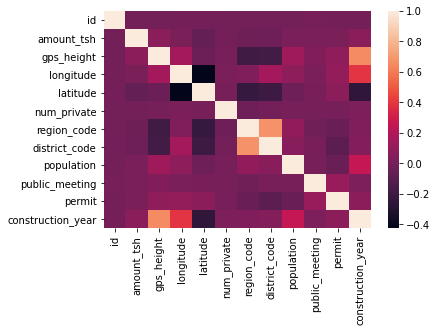

In [97]:
sns.heatmap(correlations)
plt.show()

The following groups of features

(extraction_type, extraction_type_group, extraction_type_class),
(payment, payment_type),
(water_quality, quality_group),
(source, source_class),
(subvillage, region, region_code, district_code, lga, ward),
(waterpoint_type, waterpoint_type_group)
(scheme_name, scheme_management)

contain very similar information, so the correlation between them is high. This way we are risking overfitting the training data by including all the features in our analysis.

As we saw earlier, there exists quite a strong correlation between district_code and region_code, so we will drop one of these variables. The negative correlation to the target variable of the "region_code" is higher than that of the "district_code". Keep the variable with higher correlation to the target.

In [98]:
df_train_set['recorded_by'].value_counts()


GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

The recorded_by column has one value. This will not give any information to our model. So, we dropped it also.



In [99]:
# drop columns
df_train_set = df_train_set.drop(['installer','management_group', 'num_private', 'wpt_name', 
          'recorded_by', 'subvillage', 'scheme_name', 'region', 
          'quantity', 'water_quality', 'lga','ward', 'source_type', 'payment', 
          'waterpoint_type_group','extraction_type_group','extraction_type_class'],axis=1)
df_test_set = df_test_set.drop(['installer','management_group', 'num_private', 'wpt_name', 
          'recorded_by', 'subvillage', 'scheme_name', 'region', 
          'quantity', 'water_quality', 'lga','ward', 'source_type', 'payment', 
          'waterpoint_type_group','extraction_type_group','extraction_type_class'],axis=1)

In [100]:
df_train_set.head()


,id,amount_tsh,date_recorded,funder,gps_height,longitude,latitude,basin,region_code,district_code,population,public_meeting,scheme_management,permit,construction_year,extraction_type,management,payment_type,quality_group,quantity_group,source,source_class,waterpoint_type
0,69572,6000.0,2011-03-14,Roman,1390,34.938093,-9.856322,Lake Nyasa,11,5,109,True,VWC,False,1999,gravity,vwc,annually,good,enough,spring,groundwater,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,34.698766,-2.147466,Lake Victoria,20,2,280,True,Other,True,2010,gravity,wug,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,37.460664,-3.821329,Pangani,21,4,250,True,VWC,True,2009,gravity,vwc,per bucket,good,enough,dam,surface,communal standpipe multiple
3,67743,0.0,2013-01-28,Unicef,263,38.486161,-11.155298,Ruvuma / Southern Coast,90,63,58,True,VWC,True,1986,submersible,vwc,never pay,good,dry,machine dbh,groundwater,communal standpipe multiple
4,19728,0.0,2011-07-13,Action In A,0,31.130847,-1.825359,Lake Victoria,18,1,0,True,unknown,True,0,gravity,other,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe


In [101]:
df_train_set['funder'].value_counts().head(30)


Government Of Tanzania    9084
unknown                   3635
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Dhv                        829
Private Individual         826
Dwsp                       811
0                          777
Norad                      765
Germany Republi            610
Tcrs                       602
Ministry Of Water          590
Water                      583
Dwe                        484
Netherlands                470
Hifab                      450
Adb                        448
Lga                        442
Amref                      425
Fini Water                 393
Oxfam                      359
Wateraid                   333
Rc Church                  321
Name: funder, dtype: int64

# **Reducing cardinality**

Select features

In [102]:
# Get number of unique entries in each column with categorical data
cat_vars = df_train_set.select_dtypes(include='object').columns
object_nunique = list(map(lambda col: df_train_set[col].nunique(), cat_vars))
d = dict(zip(cat_vars, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('source_class', 3),
 ('quantity_group', 5),
 ('quality_group', 6),
 ('payment_type', 7),
 ('waterpoint_type', 7),
 ('basin', 9),
 ('source', 10),
 ('management', 12),
 ('scheme_management', 13),
 ('extraction_type', 18),
 ('date_recorded', 356),
 ('funder', 1898)]

The columns in which values can be ordered we can perform an Ordinal encoding:
*   quality_group
*   quantity_group
*   payment_type

The cardinality of the following 2 features should be reduced to 10 and then one-hot encode them or try Binary encoding:
*   scheme_managenemt
*   extraction_type

What to do with the following 3? The cardinality is too high... : --> will drop at the first model run, later could try Frequency encoding,Binary encoding if reduce cardinality to at least 100.
*   funder
*   installer
*   subvillage

The rest can be one-hot encoded as the cardinality is lower than 10:

* public_meeting # later -> Binary?
* permit # later-> Binary?
* source_class
* management_group
* waterpoint_type_group
* source_type
* basin


Scheme_management

In [103]:
df_train_set.scheme_management.value_counts()


VWC                 36793
WUG                  5206
unknown              3877
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [104]:
## scheme_management
def scheme_wrangler(row):
    if row['scheme_management']=='VWC':
        return 'vwc'
    elif row['scheme_management']=='WUG':
        return 'wug'
    elif row['scheme_management']=='Water authority':
        return 'wtr_auth'
    elif row['scheme_management']=='WUA':
        return 'wua'
    elif row['scheme_management']=='Water Board':
        return 'wtr_brd'
    elif row['scheme_management']=='Parastatal':
        return 'parastatal'
    elif row['scheme_management']=='Private operator':
        return 'pri_optr'
    elif row['scheme_management']=='SWC':
        return 'swc'
    elif row['scheme_management']=='Company':
        return 'company'
    else:
        return 'other'
df_train_set['scheme_management'] = df_train_set.apply(lambda row: scheme_wrangler(row), axis=1)
df_test_set['scheme_management'] = df_test_set.apply(lambda row: scheme_wrangler(row), axis=1)

Extraction_type

In [105]:
df_train_set.extraction_type.value_counts()


gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [106]:
## extraction_type
def extraction_wrangler(row):
    if row['extraction_type']=='gravity':
        return 'gravity'
    elif row['extraction_type']=='nira/tanira':
        return 'nira/tanira'
    elif row['extraction_type']=='submersible':
        return 'submersible'
    elif row['extraction_type']=='swn 80':
        return 'swn_80'
    elif row['extraction_type']=='mono':
        return 'mono'
    elif row['extraction_type']=='india mark ii':
        return 'india_mark_ii'
    elif row['extraction_type']=='afridev':
        return 'afridev'
    elif row['extraction_type']=='ksb':
        return 'ksb'
    elif row['extraction_type']=='windmill':
        return 'windmill'
    else:
        return 'other'
df_train_set['extraction_type'] = df_train_set.apply(lambda row: extraction_wrangler(row), axis=1)
df_test_set['extraction_type'] = df_test_set.apply(lambda row: extraction_wrangler(row), axis=1)

funder

In [107]:
df_train_set.funder.value_counts()


Government Of Tanzania    9084
unknown                   3635
Danida                    3114
Hesawa                    2202
Rwssp                     1374
                          ... 
Mtambo                       1
Rashid Seng'ombe             1
Kahema                       1
Mwamvita Rajabu              1
Tadeo                        1
Name: funder, Length: 1898, dtype: int64

In [108]:
## funder
def funder_wrangler(row):  
    '''Keep top 8 values and set the rest to 'other'''

    if row['funder']=='Government Of Tanzania':
        return 'gov'
    elif row['funder']=='Danida':
        return 'danida'
    elif row['funder']=='Hesawa':
        return 'hesawa'
    elif row['funder']=='Rwssp':
        return 'rwssp'
    elif row['funder']=='World Bank':
        return 'world_bank'   
    elif row['funder']=='Kkkt':
        return 'kkkt'   
    elif row['funder']=='World Vision':
        return 'world_vision'  
    elif row['funder']=='Unicef':
        return 'unicef'
    else:
        return 'other'
    
df_train_set['funder'] = df_train_set.apply(lambda row: funder_wrangler(row), axis=1)
df_test_set['funder'] = df_test_set.apply(lambda row: funder_wrangler(row), axis=1)

# Feature Engineering

In [109]:
df_train_set['construction_year'].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

The year values are converted to decades for future encoding. Zero shows the missing values. This have majority of the data set so, it will not be changed to the mean or median, kept as new value in decades.

In [110]:
df_train_set['decade'] = df_train_set['construction_year'] #creating new columns
df_test_set['decade'] = df_test_set['construction_year'] #creating new columns


In [111]:

# dividing the column decades

df_train_set['decade'].replace(to_replace = (1960,1961,1962,1963,1964,1965,1966,1967,1968,1969),
                        value ='60s' , inplace=True)
df_train_set['decade'].replace(to_replace = (1970,1971,1972,1973,1974,1975,1976,1977,1978,1979),
                        value ='70s' , inplace=True)
df_train_set['decade'].replace(to_replace = (1980,1981,1982,1983,1984,1985,1986,1987,1988,1989),
                        value ='80s' , inplace=True)
df_train_set['decade'].replace(to_replace = (1990,1991,1992,1993,1994,1995,1996,1997,1998,1999),
                        value ='90s' , inplace=True)
df_train_set['decade'].replace(to_replace = (2000,2001,2002,2003,2004,2005,2006,2007,2008,2009),
                        value ='00s' , inplace=True)
df_train_set['decade'].replace(to_replace = (2010,2011,2012,2013),
                        value ='10s' , inplace=True)

df_test_set['decade'].replace(to_replace = (1960,1961,1962,1963,1964,1965,1966,1967,1968,1969),
                        value ='60s' , inplace=True)
df_test_set['decade'].replace(to_replace = (1970,1971,1972,1973,1974,1975,1976,1977,1978,1979),
                        value ='70s' , inplace=True)
df_test_set['decade'].replace(to_replace = (1980,1981,1982,1983,1984,1985,1986,1987,1988,1989),
                        value ='80s' , inplace=True)
df_test_set['decade'].replace(to_replace = (1990,1991,1992,1993,1994,1995,1996,1997,1998,1999),
                        value ='90s' , inplace=True)
df_test_set['decade'].replace(to_replace = (2000,2001,2002,2003,2004,2005,2006,2007,2008,2009),
                        value ='00s' , inplace=True)
df_test_set['decade'].replace(to_replace = (2010,2011,2012,2013),
                        value ='10s' , inplace=True)

In [112]:
df_train_set['decade'].value_counts()


0      20709
00s    15330
90s     7678
80s     5578
10s     5161
70s     4406
60s      538
Name: decade, dtype: int64

In [113]:
df_train_set.loc[df_train_set['construction_year']!=0].describe() # finding mean and median without zero values


,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year
count,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000
mean,37083.008736,466.457534,1002.367760,35.983262,-6.235372,15.706495,5.969786,269.799617,1996.814686
std,21420.922010,3541.036030,618.078669,2.558709,2.761317,21.003006,10.700673,552.343746,12.472045
min,1.000000,0.000000,-63.000000,29.607122,-11.649440,2.000000,1.000000,0.000000,1960.000000
25%,18489.500000,0.000000,372.000000,34.676719,-8.755274,4.000000,2.000000,30.000000,1987.000000
50%,37078.000000,0.000000,1154.000000,36.648187,-6.064216,11.000000,3.000000,150.000000,2000.000000
75%,55514.500000,200.000000,1488.000000,37.803940,-3.650661,16.000000,5.000000,305.000000,2008.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-1.042375,99.000000,63.000000,30500.000000,2013.000000


In [114]:
df_train_set['construction_year'].replace(to_replace = 0, value = 2000, inplace=True)
#changing the missing values in construction year column

In [115]:
df_test_set['construction_year'].replace(to_replace = 0, value = 2000, inplace=True)
#changing the missing values in construction year column



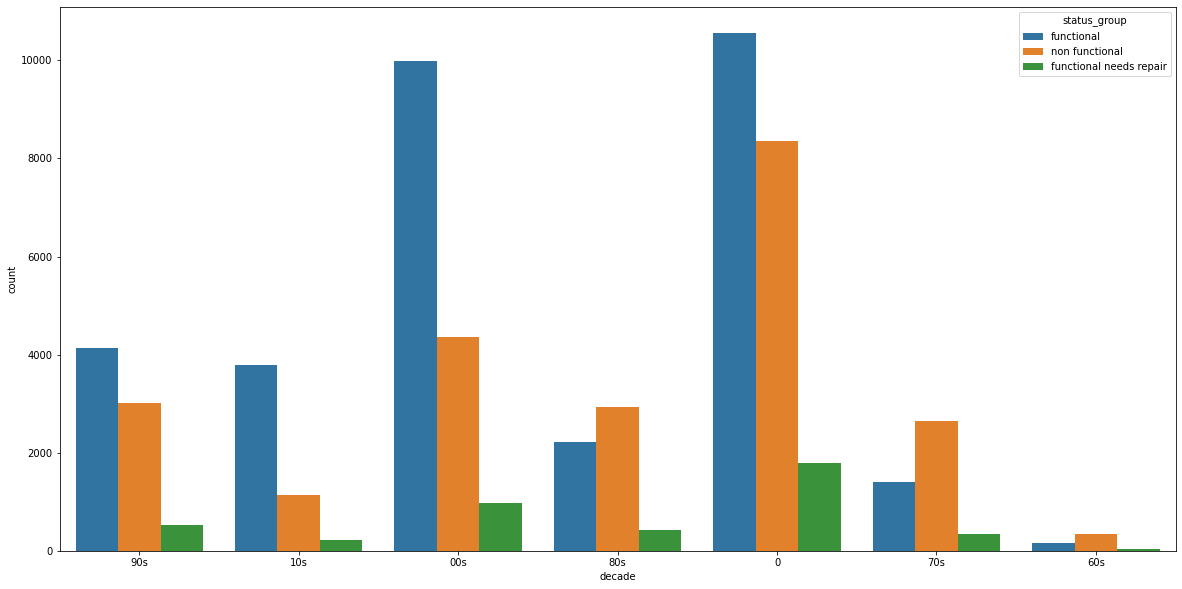

In [116]:
plt.figure(figsize=(20,10))
df = pd.merge(df_train_labels, df_train_set, how = 'inner', left_index = True,right_index=True) #merging two data sets
df.reset_index(inplace=True) # setting a new index
ax = sns.countplot(x='decade', hue="status_group", data=df)

It is obviously seen that missing values and most recent years have more functional water points.



# **Ordinal encoding of categorical data**

Several categorical features can be encoded in a specific order that follows from the range of its values. By using ordinal encoding instead of one-hot encoding we will avoid creating numerious additional columns and provide some logic to the model on how to evaluate these features. For example for the quality_group variable, the higher the label, the better the water quality, the more likely a pump is functional.

Quality_group

In [117]:
df_train_set.quality_group.value_counts()


good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [118]:
order_dict_quality = {"good":3,"salty":2,"milky":2,"colored":2,"fluoride":2,"unknown":1}
df_train_set["quality_group"] = [order_dict_quality[item] for item in df_train_set.quality_group]

df_test_set["quality_group"] = [order_dict_quality[item] for item in df_test_set.quality_group]


Quantity_group

In [119]:
df_train_set.quantity_group.value_counts()


enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [120]:
order_dict_quantity = {"enough":3,"insufficient":2,"dry":2,"seasonal":2,"unknown":1}
df_train_set["quantity_group"] = [order_dict_quantity[item] for item in df_train_set.quantity_group] 

df_test_set["quantity_group"] = [order_dict_quantity[item] for item in df_test_set.quantity_group] 


Payment_type

In [121]:
df_train_set.payment_type.value_counts()


never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [122]:
order_dict_payment = {"monthly":4,"annually":4,"on failure":3,"per bucket":3,"never pay":2,"unknown":1,"other":1}
df_train_set["payment_type"] = [order_dict_payment[item] for item in df_train_set.payment_type] 

df_test_set["payment_type"] = [order_dict_payment[item] for item in df_test_set.payment_type] 


Public_meeting

In [123]:
df_train_set.public_meeting.value_counts()


True     54345
False     5055
Name: public_meeting, dtype: int64

In [124]:
order_dict_pub_meet = {True:2,False:1,"unknown":0}
df_train_set["public_meeting"] = [order_dict_pub_meet[item] for item in df_train_set.public_meeting] 

df_test_set["public_meeting"] = [order_dict_pub_meet[item] for item in df_test_set.public_meeting] 


Permit

In [125]:
df_train_set.permit.value_counts()


True     41908
False    17492
Name: permit, dtype: int64

In [126]:
order_dict_permit = {True:2,False:1,"unknown":0}
df_train_set["permit"] = [order_dict_pub_meet[item] for item in df_train_set.permit] 

df_test_set["permit"] = [order_dict_pub_meet[item] for item in df_test_set.permit] 


# **Model**

In [127]:
# importing necessary libraries

!pip install category_encoders

#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier    #, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer,RobustScaler
from sklearn.model_selection import cross_val_score
#from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings("ignore")

import category_encoders as ce
#from category_encoders import WOEEncoder
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.compose import ColumnTransformer
#from category_encoders import TargetEncoder, LeaveOneOutEncoder, JamesSteinEncoder, MEstimateEncoder

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import MinMaxScaler
from mlxtend.evaluate import feature_importance_permutation
from sklearn.experimental import enable_hist_gradient_boosting 
#from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier

from sklearn.svm import SVC
import gc; gc.enable()

import xgboost as xgb
from xgboost import XGBClassifier

#from sklearn.neighbors import KNeighborsClassifier
#import lightgbm as lgb
#from lightgbm import LGBMClassifier

In [128]:
cat_col = ['basin','region_code','extraction_type','management','payment_type','source','source_class','waterpoint_type','scheme_management','funder','quality_group','quantity_group','permit','construction_year']
num_col = ['gps_height','longitude','latitude','district_code','population']  #,'public_meeting','permit'


Making Pipeline / Baseline¶


In [129]:
target_status_group = {'functional':0, 
                   'non functional': 2, 
                   'functional needs repair': 1} 
df_train_labels['status_group'] = df_train_labels['status_group'].replace(target_status_group)

In [130]:
# Dividing X and target 
used_cols = [c for c in df_train_set.columns.tolist()]
X=df_train_set[used_cols]
y=df_train_labels['status_group']

In [131]:
# to divide our X and y to test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [132]:
df_results = pd.DataFrame(columns=["Model", "Scaler",'Encoder',
                                   'roc_auc score mean', 'roc_auc score std']) # to see all results

In [133]:
#making pipeline

scaler = RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])#('cat', cat_transformer, cat_col)


# choosing model
#lr = LogisticRegression(class_weight = 'balanced', solver = 'lbfgs', random_state=42)     #0.5980, submission2
#rf = RandomForestClassifier(n_estimators=1000, random_state=42, n_jobs=-1, criterion= 'entropy',max_features= 'sqrt',min_samples_split= 10,class_weight='balanced') #0.5980, submission3
#xgb = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', nrounds = 'min.error.idx',         #0.7942
                      #num_class = 3, maximize = False, eval_metric = 'merror',early_stopping_rounds=10,
                        #eta = .1,max_depth = 12, colsample_bytree = .4, learning_rate = 0.1,
                       # max_delta_step=1)
xgb_smote = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', nrounds = 'min.error.idx',                  #0.7991
                      num_class = 3, maximize = False, eval_metric = 'merror', eta = .1,
                      max_depth = 24, colsample_bytree = .4, n_jobs = -1,learning_rate = 0.05,
                      early_stopping_rounds=10)

# giving all values to pipeline
pipe = make_pipeline(preprocessor,xgb_smote)
pipe.fit(X_train, y_train)


# make predictions on training set
y_pred = pipe.predict(X_train)

# make predictions on test set
y_pred_test = pipe.predict(X_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

Accuracy:
TRAIN: 0.9818368873924429
TEST: 0.7929292929292929

Balanced Accuracy:
TRAIN: 0.9511574896487573
TEST: 0.6494735562547053


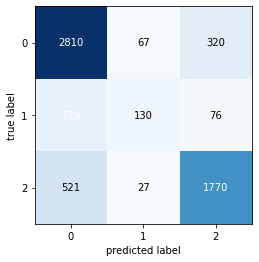

In [134]:

# to plot and understand confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()

In [135]:
df_test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 14850 non-null  int64  
 1   amount_tsh         14850 non-null  float64
 2   date_recorded      14850 non-null  object 
 3   funder             14850 non-null  object 
 4   gps_height         14850 non-null  int64  
 5   longitude          14850 non-null  float64
 6   latitude           14850 non-null  float64
 7   basin              14850 non-null  object 
 8   region_code        14850 non-null  int64  
 9   district_code      14850 non-null  int64  
 10  population         14850 non-null  int64  
 11  public_meeting     14850 non-null  int64  
 12  scheme_management  14850 non-null  object 
 13  permit             14850 non-null  int64  
 14  construction_year  14850 non-null  int64  
 15  extraction_type    14850 non-null  object 
 16  management         148

In [136]:

result = pipe.predict(df_test_set)

In [137]:
final = pd.read_csv('final_model.csv') #test set  data


In [138]:
target_status_group = {'functional':0, 
                   'non functional': 2, 
                   'functional needs repair': 1} 
final['status_group'] = final['status_group'].replace(target_status_group)

In [139]:
label=final['status_group']

In [140]:
print(f"TEST: {accuracy_score(label, result)}")

TEST: 0.8998653198653198


In [141]:
mapping = {0:'functional', 
                   2:'non functional', 
                   1:'functional needs repair'} 
translate = lambda x: mapping.get(x, x)
result = np.vectorize(translate)(result)



In [142]:
submission_df = pd.read_csv( "SubmissionFormat.csv")

In [143]:
submission_df.head()


,id,status_group
0,50785,predicted label
1,51630,predicted label
2,17168,predicted label
3,45559,predicted label
4,49871,predicted label


In [144]:
# Make sure we have the rows in the same order
np.testing.assert_array_equal(df_test_set['id'], 
                              submission_df['id'])

# Save predictions to submission data frame
submission_df["status_group"] = result

In [145]:
submission_df.to_csv('submissions/my_submission.csv',index=False)
